# dcurves Tutorial

In [1]:
!python --version

Python 3.12.6


Install dcurves On The Terminal/Command Line

In [5]:
# %%capture # This suppresses output of cell
# !pip install dcurves==1.0.6.4

## Check dcurves version

In [2]:
import dcurves
print(dcurves.__version__)

1.0.7.0


Install dcurves Functions

In [3]:
from dcurves import dca, plot_graphs

In [4]:
dca?

Signature:
dca(
    data: pandas.core.frame.DataFrame,
    outcome: str,
    modelnames: list,
    thresholds: Iterable = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99],
    harm: Optional[dict] = None,
    models_to_prob: Optional[list] = None,
    prevalence: Union[float, int, NoneType] = None,
    time: Union[float, int, NoneType] = None,
    time_to_outcome_col: Optional[str] = None,
    nper: Optional[int] = 1,
) -> pandas.core.frame.DataFrame
Doc

In [5]:
plot_graphs?

Signature:
plot_graphs(
    plot_df: pandas.core.frame.DataFrame,
    graph_type: str = 'net_benefit',
    y_limits: Iterable = (-0.05, 1),
    color_names: Optional[Iterable] = None,
    show_grid: bool = True,
    show_legend: bool = True,
    smooth_frac: float = 0.0,
    file_name: Optional[str] = None,
    dpi: int = 100,
) -> None
Docstring:
Plot specified graph type for the given data, either net benefit or net interventions avoided,
against threshold probabilities. Applies LOWESS smoothing if `smooth_frac` is greater than 0,
excluding 'all' and 'none' models from smoothing. The smoothing will be more sensitive to local variations,
keeping the smoothed lines closer to the original data points if `smooth_frac` is specified.

Parameters
----------
plot_df : pd.DataFrame
    DataFrame containing 'threshold', 'model', and either 'net_benefit' or 'net_intervention_avoided' columns.
graph_type : str, optional
    Specifies the type of plot to generate. Valid options are 'net_benefit' 

Import Other Packages Used In This Tutorial

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import lifelines
# Display plots in notebook
%matplotlib inline 

Import Cancer Simulation Dataset

In [7]:
df_cancer_dx = pd.read_csv('https://raw.githubusercontent.com/ddsjoberg/dca-tutorial/main/data/df_cancer_dx.csv')

Create A Generalized Linear Model

In [8]:
%%capture
mod1 = sm.GLM.from_formula('cancer ~ famhistory', data=df_cancer_dx, family=sm.families.Binomial())
mod1_results = mod1.fit()

mod1_results.summary()

In [9]:
df_cancer_dx

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker
0,1,0,low,64.03445,0,0.776309,0.037201
1,2,0,high,78.46741,0,0.267086,0.578907
2,3,0,low,64.14617,0,0.169621,0.021551
3,4,0,low,58.53482,0,0.023996,0.003910
4,5,0,low,63.99250,0,0.070910,0.018790
...,...,...,...,...,...,...,...
745,746,0,intermediate,66.09628,0,0.654782,0.057813
746,747,1,intermediate,65.75370,1,1.030259,0.160424
747,748,0,intermediate,70.28287,0,0.151616,0.108838
748,749,0,low,61.32673,0,0.624602,0.015285


Run DCA With Cancer Outcome and Famhistory Predictor/Model

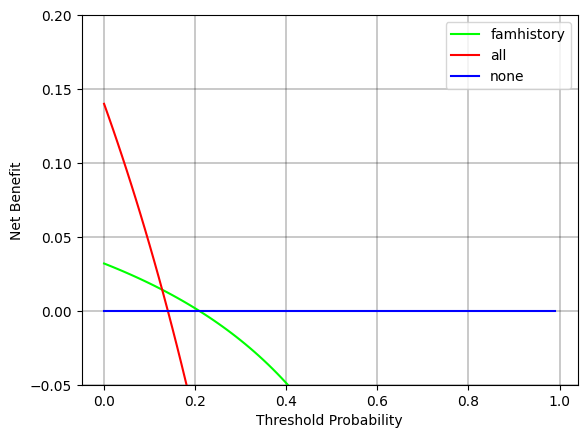

In [19]:
dca_famhistory_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory']
    )

plot_graphs(
    plot_df=dca_famhistory_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2]
)

Run DCA With Cancer Outcome and Famhistory Predictor/Model with Abridged Thresholds

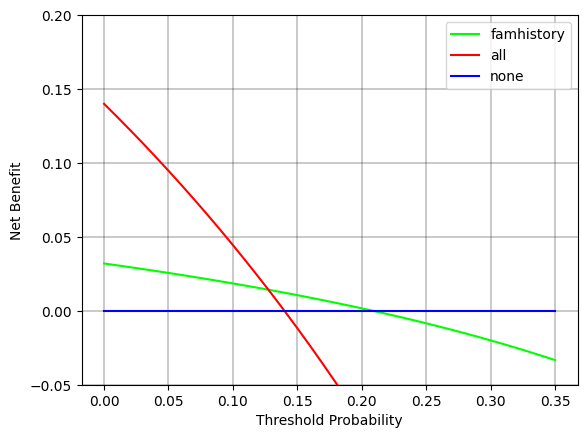

In [20]:
dca_famhistory2_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory'],
        thresholds=np.arange(0, 0.36, 0.01),
    )

plot_graphs(
    plot_df=dca_famhistory2_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2]
)

Run Multivariate Model and Print Model Summary

In [42]:
%%capture
mod2 = sm.GLM.from_formula('cancer ~ marker + age + famhistory', data=df_cancer_dx, family=sm.families.Binomial())
mod2_results = mod2.fit()

In [40]:
mod2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cancer   No. Observations:                  750
Model:                            GLM   Df Residuals:                      746
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -213.89
Date:                Tue, 30 Jan 2024   Deviance:                       427.79
Time:                        11:38:06   Pearson chi2:                     743.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2130
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.0703      2.211     -9.984      0.000     -26.403     -17.738
marker         0.9783      0.118      8.276      0.000       0.747       1.210
age            0.2820      0.031      9.040      0.000       0.221       0.343
famhistory     0.8652      0.308      2.807      0.005       0.261       1.469
==============================================================================
"""

Following 3 Steps Coming Soon! 
- build multivariable logistic regression model
- summarize model
- add predicted values from model to data set

Run DCA on Multivariable Model

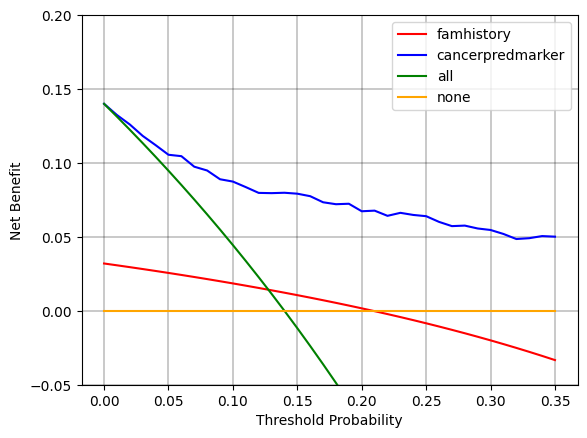

In [24]:
dca_multi_df = \
    dca(
        data=df_cancer_dx,
        outcome='cancer',
        modelnames=['famhistory', 'cancerpredmarker'],
        thresholds=np.arange(0,0.36,0.01)
    )

plot_graphs(
    plot_df=dca_multi_df,
    y_limits=[-0.05, 0.2],
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green', 'orange']
)

Smooth #1

In [ ]:
# Coming Soon

Smooth #2

In [ ]:
# Coming Soon

Published Model

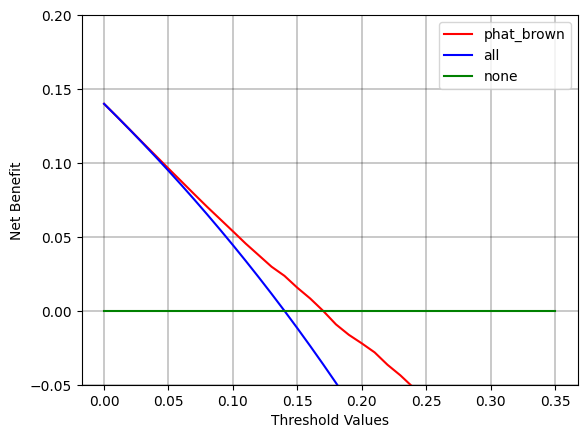

In [18]:
df_cancer_dx['logodds_brown'] = 0.75 * df_cancer_dx['famhistory'] + 0.26*df_cancer_dx['age'] - 17.5
df_cancer_dx['phat_brown'] = np.exp(df_cancer_dx['logodds_brown']) / (1 + np.exp(df_cancer_dx['logodds_brown']))

dca_pub_model_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['phat_brown'],
      thresholds=np.arange(0,0.36,0.01),
  )

plot_graphs(
    plot_df=dca_pub_model_df,
    y_limits=[-0.05, 0.2],
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green']
)

Joint Calculations

In [21]:
df_cancer_dx['high_risk'] = np.where(df_cancer_dx['risk_group'] == "high", 1, 0)

df_cancer_dx['joint'] = np.where((df_cancer_dx['risk_group'] == 'high') |
                                 (df_cancer_dx['cancerpredmarker'] > 0.15), 1, 0)

df_cancer_dx['conditional'] = np.where((df_cancer_dx['risk_group'] == "high") |
                                       ((df_cancer_dx['risk_group'] == "intermediate") &
                                        (df_cancer_dx['cancerpredmarker'] > 0.15)), 1, 0)

Perform DCA On Joint Data

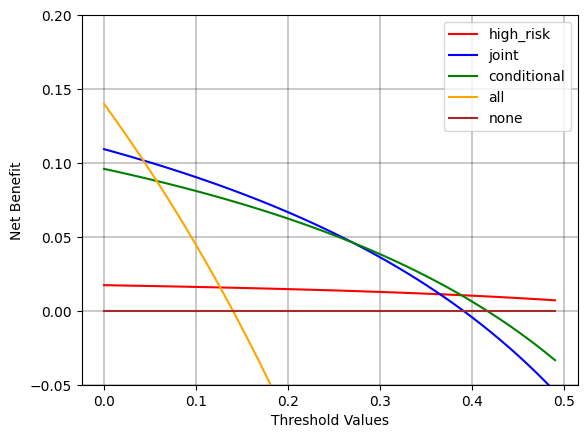

In [22]:
dca_joint_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['high_risk', 'joint', 'conditional'],
      thresholds=np.arange(0, 0.5, 0.01)
  )

plot_graphs(
  plot_df=dca_joint_df,
  graph_type='net_benefit',
  y_limits=[-0.05, 0.2],
  color_names=['red', 'blue', 'green', 'orange', 'brown']
)

Run DCA On a Simple Harms Per Model Case

In [34]:
%%capture
dca_harm_simple_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['marker'],
      thresholds=np.arange(0, 0.36, 0.01),
      harm={'marker': 0.0333},
      models_to_prob=['marker']
  )

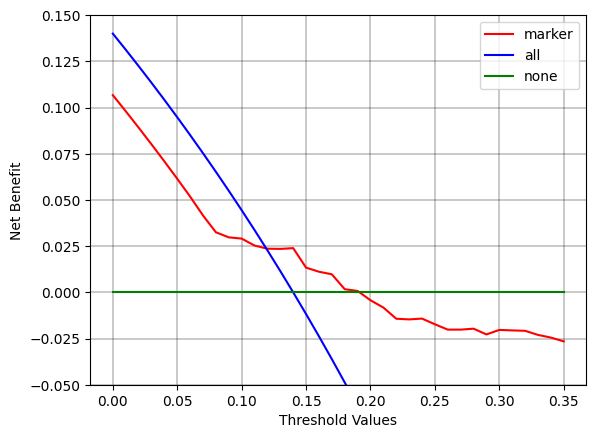

In [35]:
plot_graphs(
    plot_df=dca_harm_simple_df,
    graph_type='net_benefit',
    color_names=['red', 'blue', 'green'],
    y_limits=[-0.05, 0.15]
)

Run DCA On a Harms Per Model Case

In [32]:
%%capture
harm_marker = 0.0333
df_cancer_dx
harm_conditional = (df_cancer_dx['risk_group'] == "intermediate").mean() * harm_marker
# df_cancer_dx['risk_group']

dca_harm_df = \
  dca(
      data=df_cancer_dx,
      outcome='cancer',
      modelnames=['risk_group'],
      models_to_prob=['risk_group'],
      thresholds=np.arange(0, 0.36, 0.01),
      harm={'risk_group': harm_conditional}
  )

In [ ]:
plot_graphs(
    plot_df=dca_harm_df,
    graph_type='net_benefit',
    y_limits=[-0.05, 0.2],
    color_names=['red', 'blue', 'green']
)

In [ ]:
harm_conditional

# Tutorial Cross Validation Code

In [30]:
%%capture
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
import statsmodels.api as sm
from dcurves import dca

random.seed(112358)

df_cancer_dx = \
    pd.read_csv(
        "https://raw.githubusercontent.com/ddsjoberg/dca-tutorial/main/data/df_cancer_dx.csv"
    )

# Define the formula (make sure the column names in your DataFrame match these)
formula = 'cancer ~ marker + age + famhistory'

# Create cross-validation object
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=112358)

# Placeholder for predictions
cv_predictions = []

# Perform cross-validation
for train_index, test_index in rkf.split(df_cancer_dx):
    # Split data into training and test sets
    train, test = df_cancer_dx.iloc[train_index], df_cancer_dx.iloc[test_index]

    # Fit the model
    model = sm.Logit.from_formula(formula, data=train).fit(disp=0)

    # Make predictions on the test set
    test['cv_prediction'] = model.predict(test)

    # Store predictions
    cv_predictions.append(test[['patientid', 'cv_prediction']])

# Concatenate predictions from all folds
df_predictions = pd.concat(cv_predictions)

# Calculate mean prediction per patient
df_mean_predictions = df_predictions.groupby('patientid')['cv_prediction'].mean().reset_index()

# Join with original data
df_cv_pred = pd.merge(df_cancer_dx, df_mean_predictions, on='patientid', how='left')

# Decision curve analysis
# Generate net benefit score for each threshold value
df_dca_cv = dcurves.dca(
        data=df_cv_pred, modelnames=['cv_prediction'], outcome='cancer'
    )

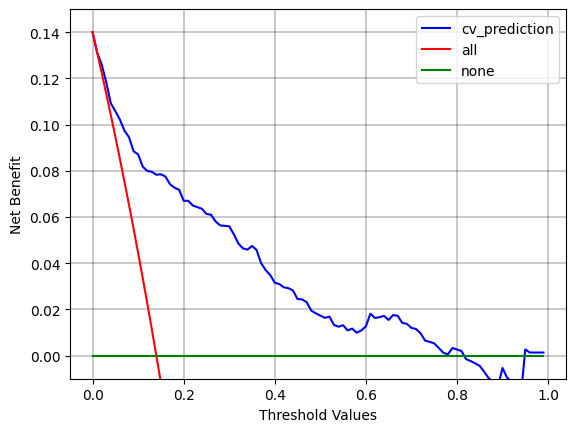

In [31]:
# Plot DCA curves
dcurves.plot_graphs(plot_df=df_dca_cv, graph_type='net_benefit', y_limits=[-0.01, 0.15], color_names=['blue', 'red', 'green'])

In [26]:
df_cv_pred

,patientid,cancer,risk_group,age,famhistory,marker,cancerpredmarker,cv_prediction
0,1,0,low,64.03445,0,0.776309,0.037201,0.040179
1,2,0,high,78.46741,0,0.267086,0.578907,0.608252
2,3,0,low,64.14617,0,0.169621,0.021551,0.021157
3,4,0,low,58.53482,0,0.023996,0.003910,0.003686
4,5,0,low,63.99250,0,0.070910,0.018790,0.017741
...,...,...,...,...,...,...,...,...
745,746,0,intermediate,66.09628,0,0.654782,0.057813,0.060643
746,747,1,intermediate,65.75370,1,1.030259,0.160424,0.163386
747,748,0,intermediate,70.28287,0,0.151616,0.108838,0.114970
748,749,0,low,61.32673,0,0.624602,0.015285,0.013488
